<a href="https://colab.research.google.com/github/AstralGoGod/UChicagoPHYS131Labs/blob/main/Copy_of_Period_of_a_Pendulum_(Part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PERIOD OF A PENDULUM (Part 2)

*Last updated 10/5/2022*

This notebook is a continuation of the notebook provided in Part 1. See that notebook for more details.

*Note that if the cells below are collapsed, you can click the little triangle next to the header to expand the cells*.

# Preliminary cells
These cells load libraries and define some useful functions. Later when you have more time, you can look closely at the code and try to understand what it is doing, but for now you can just run the cells by clicking `shift+enter` and moving on. (There is no output.)

In [1]:
# These lines load important libraries into memory
import numpy as np
from matplotlib import pyplot as plt

# Below are several functions we want to define
def average(x):
    sum = 0                  # initializes our running total to be zero and calls it "sum"
    for number in x:         # makes a loop over the list "x"
        sum = sum + number   # adds the current item in the list (called "number" to the running total (called "sum")
    return(sum / len(x))     # divides the total by the number of items in the list

def standard_deviation(x):
    avg = average(x)
    variance = 0                                # initializes our running total to be zero and calls it "variance"
    for number in x:                            # makes a loop over the list "x"
        variance = variance + (number - avg)**2 # adds the square of the difference between each item and the average
    return(np.sqrt(variance/(len(x)-1)))        # divides the total by N-1

def standard_error(x):
    return(standard_deviation(x))/np.sqrt(len(x)) # divides the standard deviation by sqrt of the number of points

def t_prime(A, dA, B, dB=0):               # Calculates the t_prime value between A +/- dA and B +/- B
    return((A-B)/np.sqrt(dA**2 + dB**2))   # If only 3 arguments are given, assumes dB = 0 (e.g. a literature value)

In [2]:
# These lines control how our figures look
%matplotlib inline
plt.rcParams['figure.dpi'] = 160 #Change this value to make your picture bigger or smaller

# Part 2 -- Individual measurements for larger $\theta$
As you continue your experiment on Day 2, you may use this section to continue plotting your period data.

**Edit** the first line here by entering the length of the pendulum. The rest of the code will will calculate the predicted period.

In [3]:
# L is the length of your pendulum (in meters)
L = 1.037

# T_predicted is the value of the period predicted from the formula (in seconds)
T_predicted = 2*np.pi*np.sqrt(L/9.81)

print("Predicted Period: T = ", T_predicted, "seconds")

Predicted Period: T =  2.0428418338122407 seconds


Continue adding data at larger angles. We have created some empty lists, but you can add lists at any angle by following the naming pattern.

- Create a new blank list of the form `Txx` where `xx` is the angle (in degrees)
- Add that angle (in degrees) to the list `angles`
- Add the new angle to the list `angles_All` and the period to the list `T_All`

In [4]:
# T5 and T10 are lists of your measured periods of 5 and 10 degrees, respectively

T10 = [2.01, 2.03,2.08,2.00,2.08,2.05]
T15 = [2.02,1.98,2.06,2.00,1.99,1.98]
T20 = [2.04,1.98,1.97,2.03,2.00,2.07]
T30 = [2.09,2.10,2.10,2.08,2.02,1.99]
T50 = [1.97,2.01,2.09,2.06,1.99,2.09]
T70 = [2.05,2.08,2.06,2.00,2.01,2.05]
T90 = [2.11,2.10,2.01,2.11,2.13,2.08]

# T_All is a list of lists
angles_All = [10, 15, 20, 30, 50, 70, 90]
T_All = [T10,T15,T20,T30,T50,T70,T90]

Next we compute the average period and uncertainty for each angle.

In [5]:
angles = []
avg = []
davg = []

print("Predicted T = ", T_predicted, "seconds")
# This loop goes through all of your data and finds the average and standard deviation of the mean for each angle.
for n,T in enumerate(T_All):
    if len(T)>0:
        angles.append(angles_All[n])
        avg.append(average(T))
        davg.append(standard_error(T))
        print("T at", angles[n],"degrees = ", avg[n], "+/-", davg[n], "seconds")

Predicted T =  2.0428418338122407 seconds
T at 10 degrees =  2.0416666666666665 +/- 0.014003967691733368 seconds
T at 15 degrees =  2.0050000000000003 +/- 0.012583057392117928 seconds
T at 20 degrees =  2.015 +/- 0.01565247584249851 seconds
T at 30 degrees =  2.063333333333333 +/- 0.019090428084368477 seconds
T at 50 degrees =  2.0349999999999997 +/- 0.0212524508390601 seconds
T at 70 degrees =  2.0416666666666665 +/- 0.012494443209327563 seconds
T at 90 degrees =  2.0900000000000003 +/- 0.01732050807568879 seconds


Next, we plot the data.

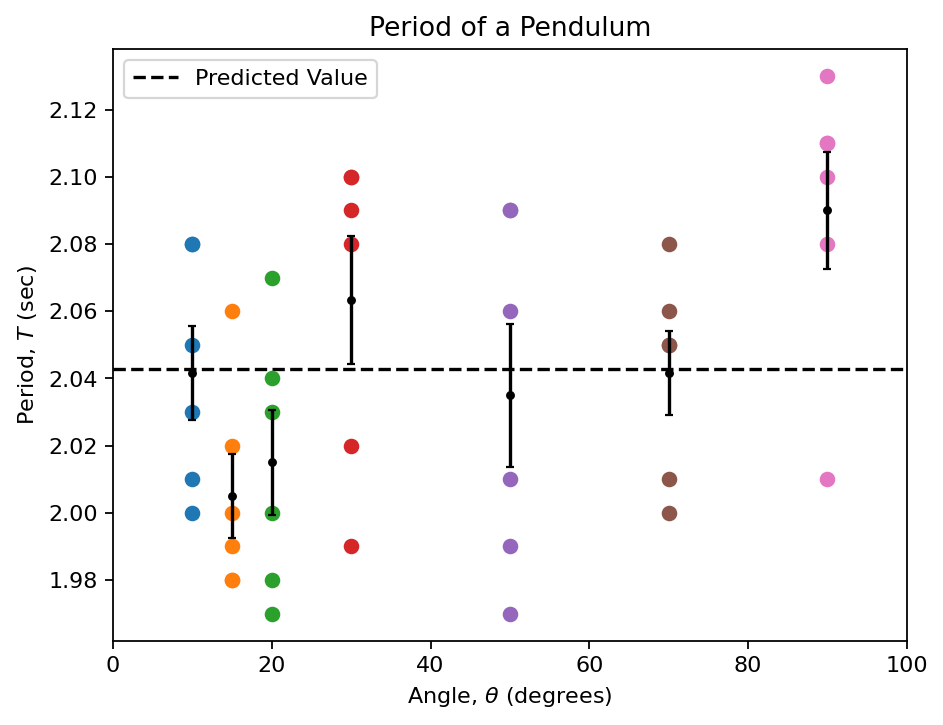

In [6]:
plt.figure()
plt.axhline(T_predicted, color = 'black', linestyle='--', label='Predicted Value')

for n,T in enumerate(T_All):
    if len(T)>0:
        plt.plot(angles[n]*np.ones(len(T)), T, 'o')
        # this plots your data points for each angle

plt.errorbar(angles, avg, davg, fmt = 'k.', capsize=2)
    #this plots the average and standard deviation of the mean for each angle
plt.xlabel("Angle, $\\theta$ (degrees)")
plt.ylabel("Period, $T$ (sec)")
plt.title("Period of a Pendulum")
plt.xlim([0, 100])
plt.legend()
plt.show()

Finally, check the $t^{\prime}$ value at each angle to see if we have agreement.

In [7]:
for n, theta in enumerate(angles):
    print("For", theta, "degrees, t' =", t_prime(avg[n], davg[n], T_predicted))

For 10 degrees, t' = -0.08391672784763028
For 15 degrees, t' = -3.007364000099422
For 20 degrees, t' = -1.778749514926347
For 30 degrees, t' = 1.0733913053458999
For 50 degrees, t' = -0.36898491715733933
For 70 degrees, t' = -0.09405518324313089
For 90 degrees, t' = 2.722677994299208


#Looking at an "improved" model
*Don't move on to this section until instructed to do so by your TA!*

Now we can use a more sophisticated model for the predicted period. This model *depends* on angle, and therefore we need to compute the predicted period separately for each angle.

We won't derive the formula here, but the full solution model comes from solving a differential equation that involves *all* the forces acting on the pendulum mass:

$T = 2\pi\sqrt{\frac{L}{g}} \bigg(\frac{K(\sin(\theta/2))}{\pi/2}\bigg)$

where

$K(x) = \int_0^{\pi/2} \frac{\textrm{d}u}{\sqrt{1-x^2\sin^2 u}}$

is a so-called *elliptical integral*. This integral has no closed-form solution, so the best we can do is rewrite it in terms of Legendre Polynomials and perform a Taylor expansion around zero angle. This gives the following approximation:

$T = 2\pi\sqrt{\frac{L}{g}}\bigg[1 + \frac{1}{4}\sin^2(\theta/2) + \frac{9}{64}\sin^4(\theta/2)+\ldots\bigg]$

This approximation has an infinite number of terms. We can see whether adding the additional two terms shown here improves the agreement between the experimental data and the model.

In [8]:
def T_predicted_expanded(ell, x):
    theta = x*np.pi/180
    return 2*np.pi*np.sqrt(ell/9.81)*(1 + 1/4*np.sin(theta/2)**2 + 9/64*np.sin(theta/2)**4)

# T_predicted is the value of the period predicted from the formula (in seconds)
for n, theta in enumerate(angles):
    print("Theta = ", theta, "degrees // Predicted Period: T = ", T_predicted_expanded(L, theta), "seconds")

Theta =  10 degrees // Predicted Period: T =  2.0467378295843344 seconds
Theta =  15 degrees // Predicted Period: T =  2.0516262372547653 seconds
Theta =  20 degrees // Predicted Period: T =  2.058502841478194 seconds
Theta =  30 degrees // Predicted Period: T =  2.078342034455932 seconds
Theta =  50 degrees // Predicted Period: T =  2.143221996095836 seconds
Theta =  70 degrees // Predicted Period: T =  2.241953420693168 seconds
Theta =  90 degrees // Predicted Period: T =  2.3700157212587323 seconds


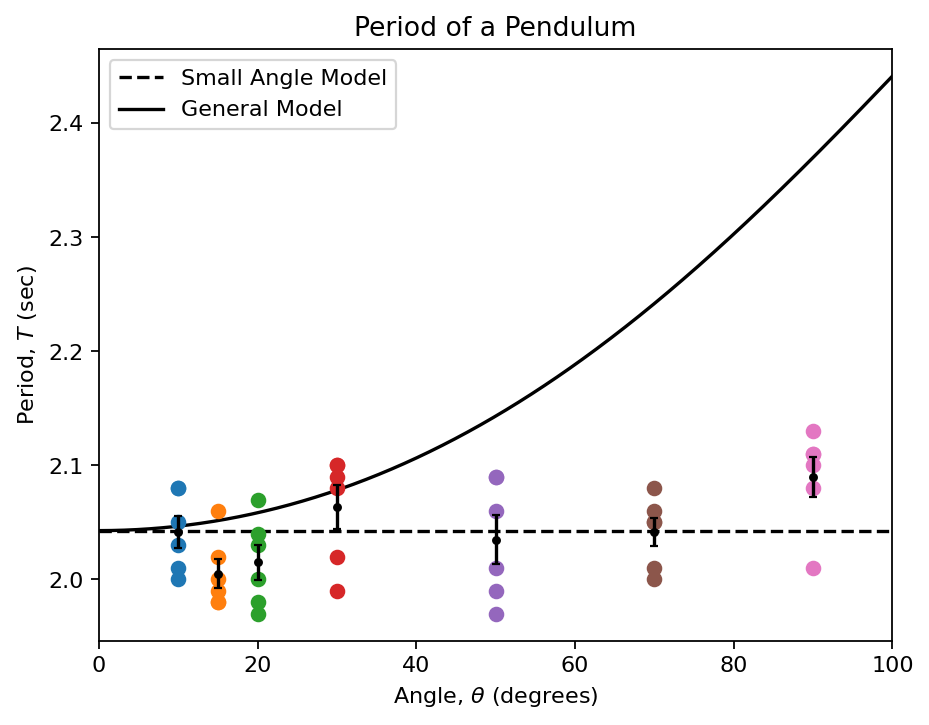

In [13]:
plt.figure()
plt.axhline(T_predicted, color = 'black', linestyle='--', label='Small Angle Model')
ANGLES = np.linspace(0, 100, 500)
plt.plot(ANGLES, T_predicted_expanded(L, ANGLES), 'k-', label='General Model')

for n,T in enumerate(T_All):
    if len(T)>0:
        plt.plot(angles[n]*np.ones(len(T)), T, 'o')
        # this plots your data points for each angle

plt.errorbar(angles, avg, davg, fmt = 'k.', capsize=2)
    #this plots the average and standard deviation of the mean for each angle
plt.xlabel("Angle, $\\theta$ (degrees)")
plt.ylabel("Period, $T$ (sec)")
plt.title("Period of a Pendulum")
plt.xlim([0, 100])
plt.legend()
plt.show()

Finally, we can perform the $t^{\prime}$ test on each point.

In [14]:
for n, theta in enumerate(angles):
    print("For", theta, "degrees, t' =", t_prime(avg[n], davg[n],
          T_predicted_expanded(L,theta)))

For 10 degrees, t' = -0.3621232945761071
For 15 degrees, t' = -3.7054775959276673
For 20 degrees, t' = -2.7792945931325486
For 30 degrees, t' = -0.7861898673130512
For 50 degrees, t' = -5.092212513059155
For 70 degrees, t' = -16.030066379987222
For 90 degrees, t' = -16.166715204605595
